## 3.2 필기체를 분류하는 DNN 구현
4단계로 은닉 계층이 늘어난 DNN을 케라스로 구현합니다.

### 3.2.1 기본 파라미터 설정 
이 절에서는 4단계로 은닉 계층이 늘어난 DNN을 케라스로 구현합니다.

#### 3.2.1 기본 파라미터 설정
 1. DNN 구현에 필요한 파라미터를 정의합니다.

In [1]:
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

### 3.2.2 DNN 모델 구현
2. 필기체 분류를 위한 DNN 모델을 구현합니다. 

In [2]:
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])

### 3.2.3 데이터 준비
3. 분류 DNN을 위한 데이터 준비는 2.2.2절 ‘분류 ANN에 사용할 데이터 불러오기’와 같습니다

In [8]:
import numpy as np      
# from keras import datasets 
from tensorflow.keras import datasets  # Colab 지원 (tensorflow, keras 2.8 버전)  
from keras.utils import np_utils 
 
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

### 3.2.4 학습 및 성능 평가
4. 다음은 학습과 성능 평가 단계입니다.

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
480/480 [==============================] - 5s 5ms/step - loss: 0.3739 - accuracy: 0.8943 - val_loss: 0.1847 - val_accuracy: 0.9460
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9537 - val_loss: 0.1381 - val_accuracy: 0.9603
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9683 - val_loss: 0.1149 - val_accuracy: 0.9637
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9745 - val_loss: 0.1034 - val_accuracy: 0.9690
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9714
Test Loss and Accuracy -> [0.09638112783432007, 0.9714000225067139]


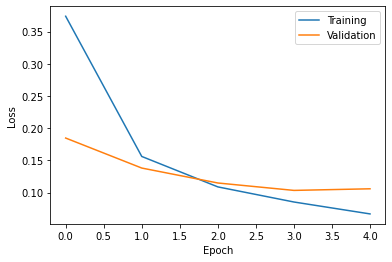

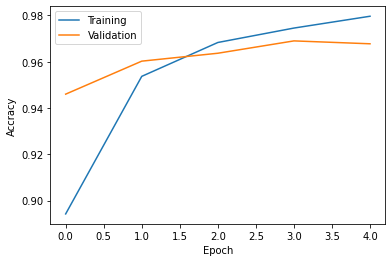

In [9]:
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss, plot_acc

model = DNN(Nin, Nh_l, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()

history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

---
### 3.2.5 전체 코드 

Epoch 1/5
480/480 [==============================] - 3s 4ms/step - loss: 0.3728 - accuracy: 0.8941 - val_loss: 0.1906 - val_accuracy: 0.9443
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9548 - val_loss: 0.1311 - val_accuracy: 0.9618
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1120 - accuracy: 0.9670 - val_loss: 0.1211 - val_accuracy: 0.9643
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0871 - accuracy: 0.9738 - val_loss: 0.1041 - val_accuracy: 0.9689
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9682
Test Loss and Accuracy -> [0.10574129968881607, 0.9682000279426575]


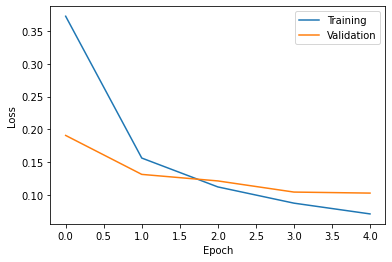

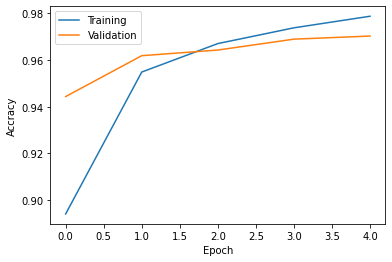

In [10]:
# File: ex3_1_dnn_mnist_cl.py

# 1. 기본 파라미터 설정
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class
 
# 1. 분류 DNN 모델 구현 
from keras import layers, models
 
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])
        
# 3. 데이터 준비
import numpy as np 
# from keras import datasets 
from tensorflow.keras import datasets  # Colab 지원 (tensorflow, keras 2.8 버전)        
from keras.utils import np_utils 
 
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)
 
# 4. 분류 DNN 학습 및 테스팅 
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss, plot_acc

def main():
    model = DNN(Nin, Nh_l, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
main()    